In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
import pandas as pd
train_imageids = pd.Series(os.listdir('/content/drive/MyDrive/code/cover/')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir('/content/drive/MyDrive/code/test/')).sort_values(ascending=True).reset_index(drop=True)

In [ ]:
cover_images_path = pd.Series('/content/drive/MyDrive/code/cover/' + train_imageids ).sort_values(ascending=True)
juniward_images_path = pd.Series('/content/drive/MyDrive/code/juniward/'+train_imageids).sort_values(ascending=True)

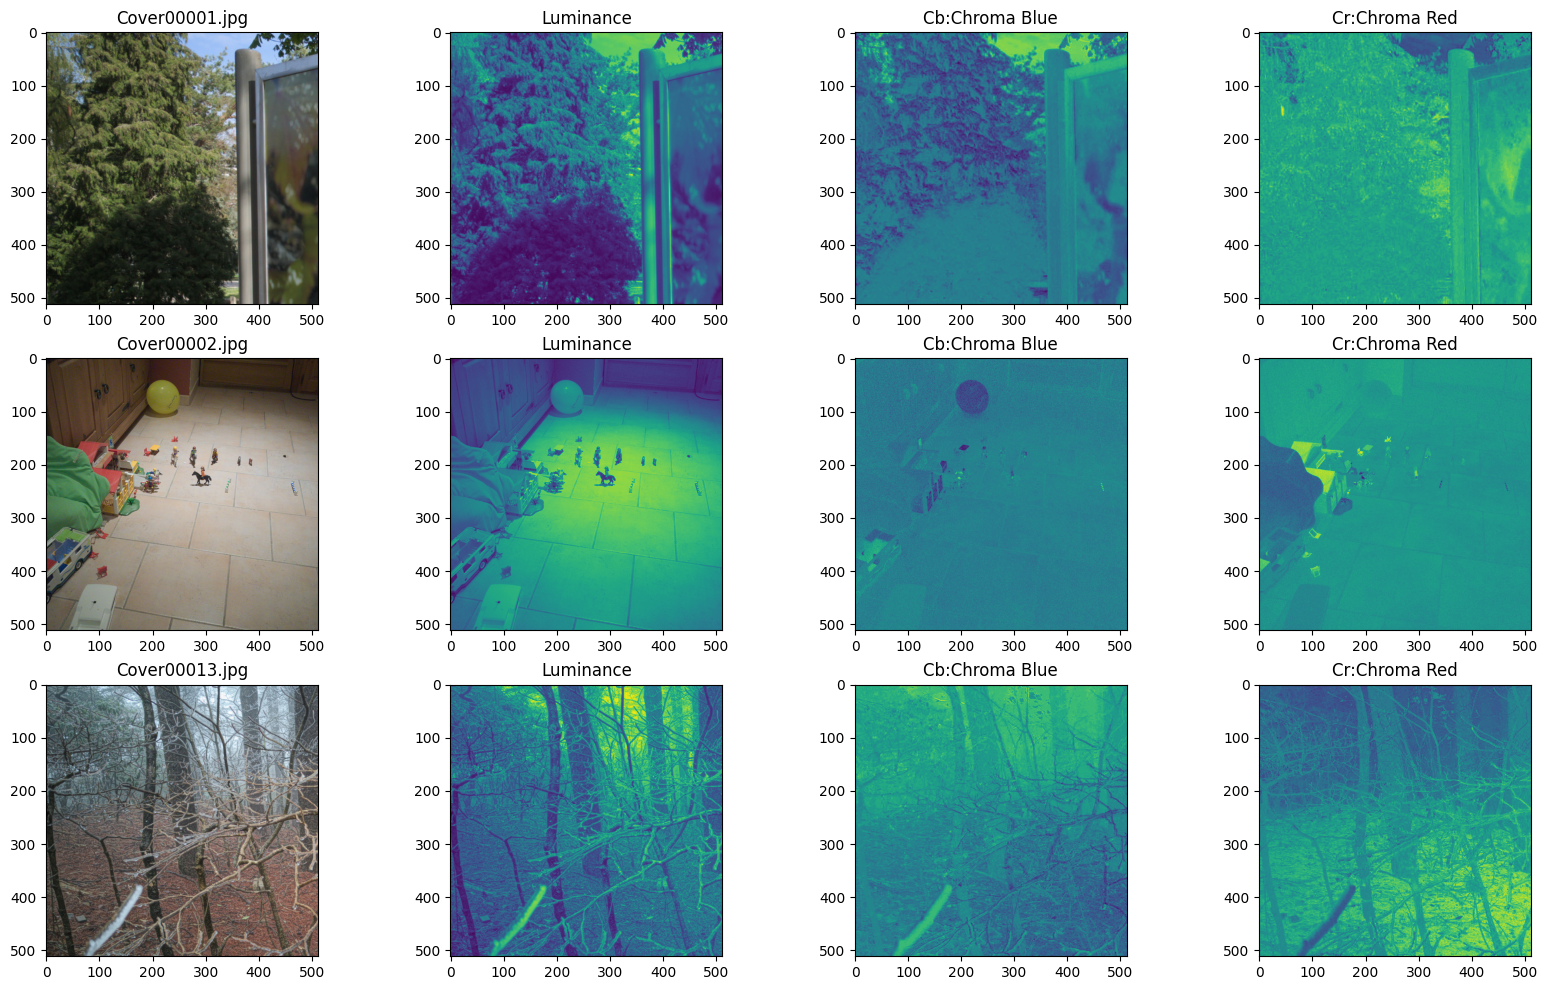

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3,4,figsize=(20,12))

for i,paths in enumerate(cover_images_path[:3]):
    image = Image.open(paths)
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Cover'+train_imageids[i])
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')


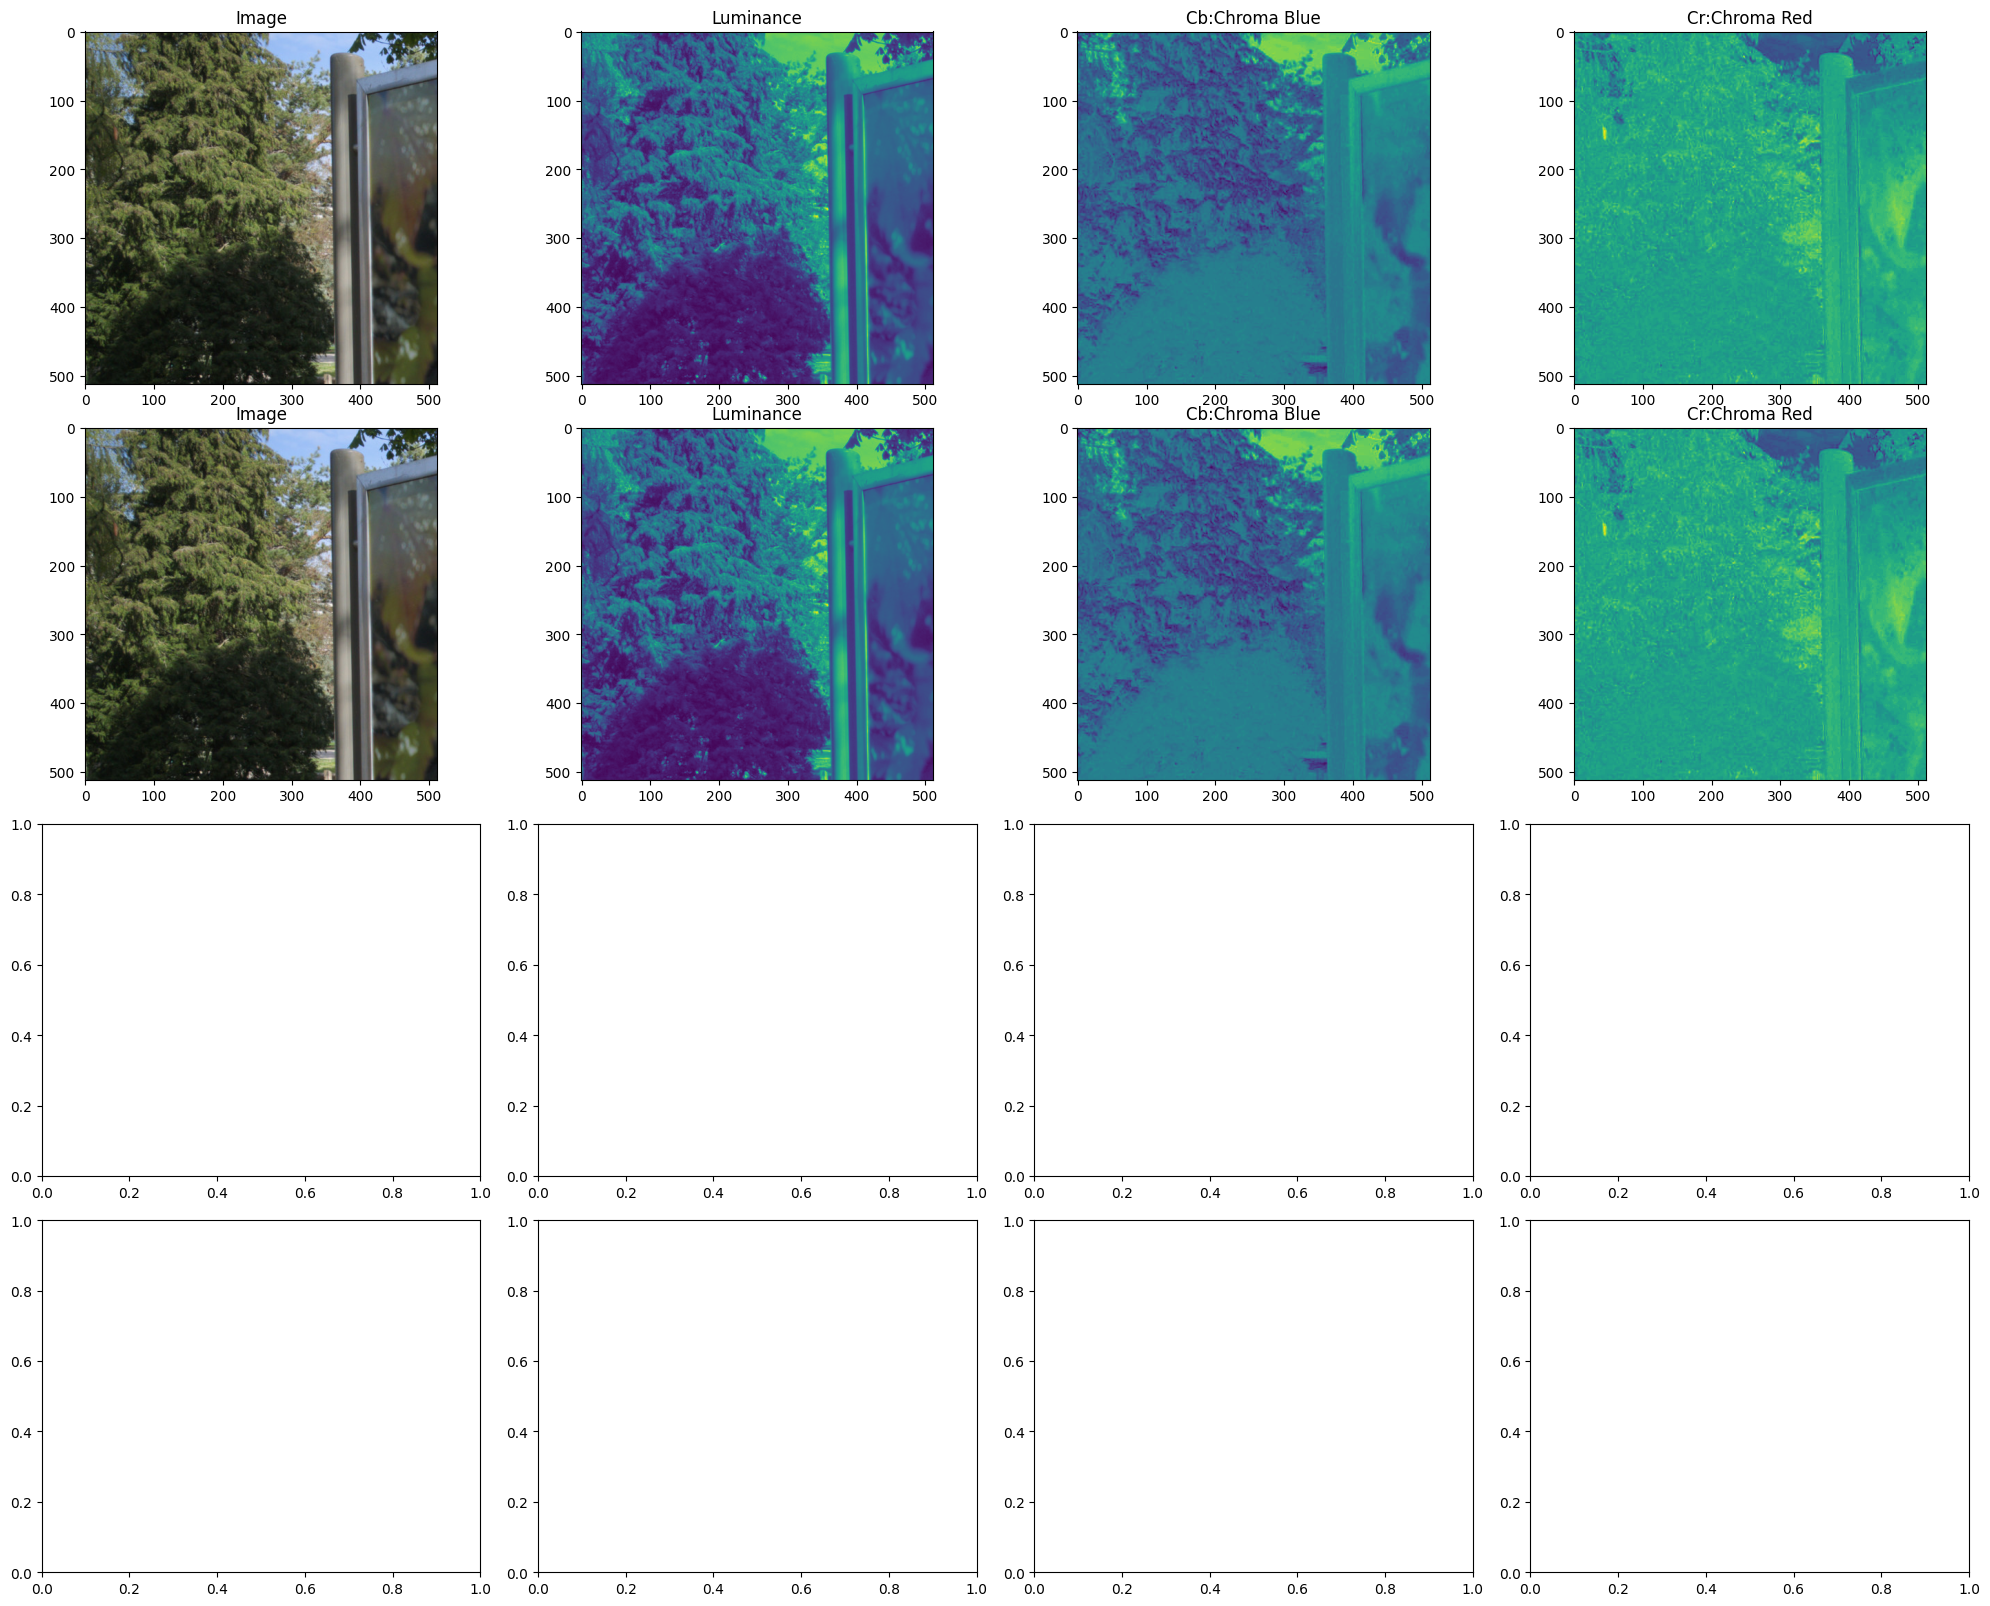

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()


im1 = Image.open(cover_images_path[0])
im2 = Image.open(juniward_images_path[0])


for i,image in enumerate([im1,im2]):
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [ ]:
! git clone https://github.com/dwgoon/jpegio

Cloning into 'jpegio'...
remote: Enumerating objects: 1408, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 1408 (delta 124), reused 212 (delta 101), pack-reused 1154
Receiving objects: 100% (1408/1408), 231.74 MiB | 36.46 MiB/s, done.
Resolving deltas: 100% (699/699), done.


In [ ]:
!pip install jpegio/.
import jpegio as jio

Processing ./jpegio
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jpegio: filename=jpegio-0.2.4-cp310-cp310-linux_x86_64.whl size=1235221 sha256=8e7cdc4447df05b2b04baae7652187cd93f26c90b6dce24239ae676ed268ad6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-s35eawe8/wheels/10/ca/cc/c43f08f7d0a6c7568811cb6bba751aaf6722c8d856cbd8f823
Successfully built jpegio


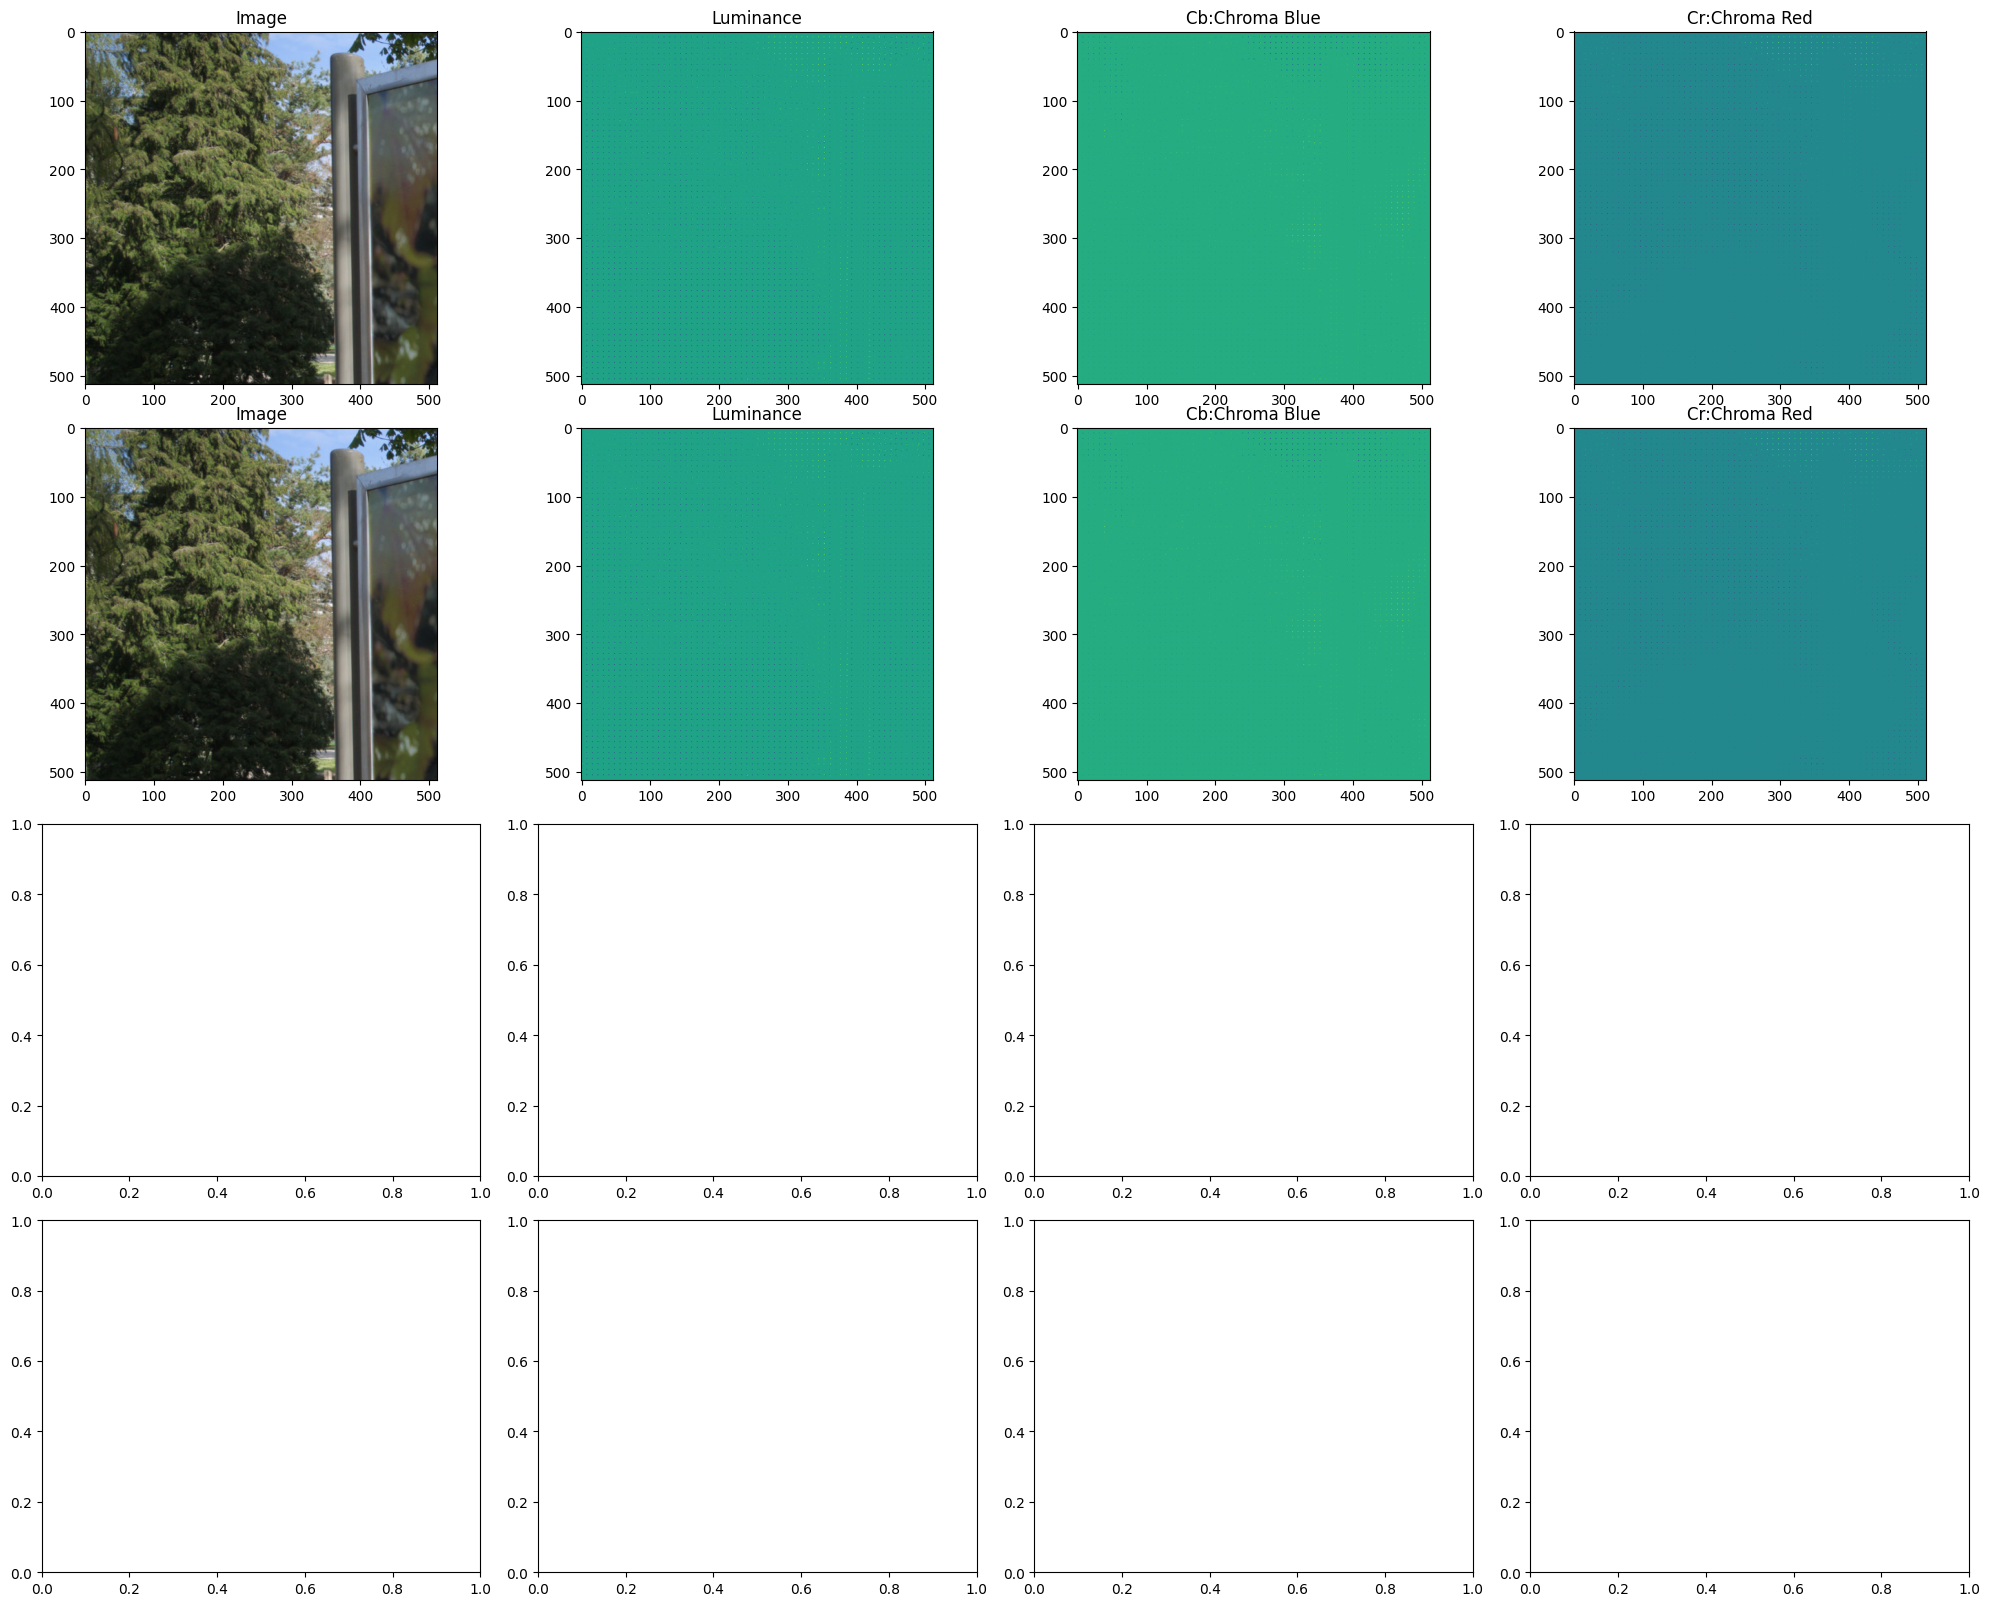

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()

for i,path in enumerate([cover_images_path[0],juniward_images_path[0]]):

    image = Image.open(path)
    jpeg = jio.read(path)
    DCT_Y = jpeg.coef_arrays[0]
    DCT_Cr = jpeg.coef_arrays[1]
    DCT_Cb = jpeg.coef_arrays[2]


    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(DCT_Y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(DCT_Cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(DCT_Cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [ ]:
coverDCT = np.zeros([512,512,3])
stegoDCT = np.zeros([512,512,3])
jpeg = jio.read(cover_images_path[0])
stego_juni = jio.read(juniward_images_path[0])

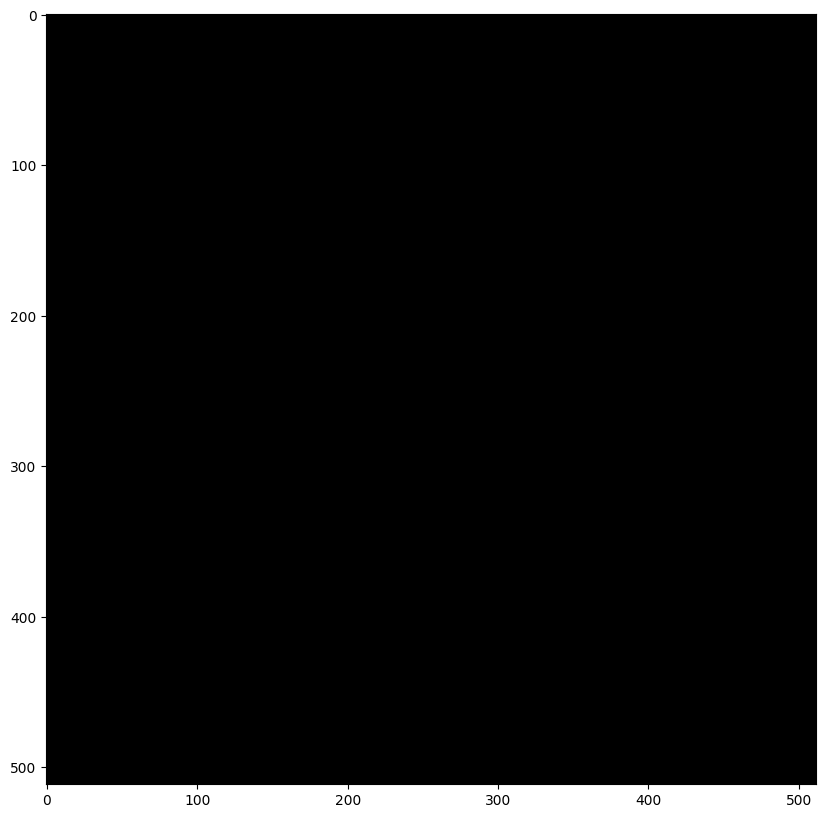

In [ ]:
coverDCT[:,:,0] = jpeg.coef_arrays[0] ; coverDCT[:,:,1] = jpeg.coef_arrays[1] ; coverDCT[:,:,2] = jpeg.coef_arrays[2]
stegoDCT[:,:,0] = stego_juni.coef_arrays[0] ; stegoDCT[:,:,1] = stego_juni.coef_arrays[1] ; stegoDCT[:,:,2] = stego_juni.coef_arrays[2]

cover_diff = coverDCT - coverDCT
plt.figure(figsize=(16,10))
plt.imshow( abs(cover_diff) )
plt.show()

5883
[-1.  0.  1.]


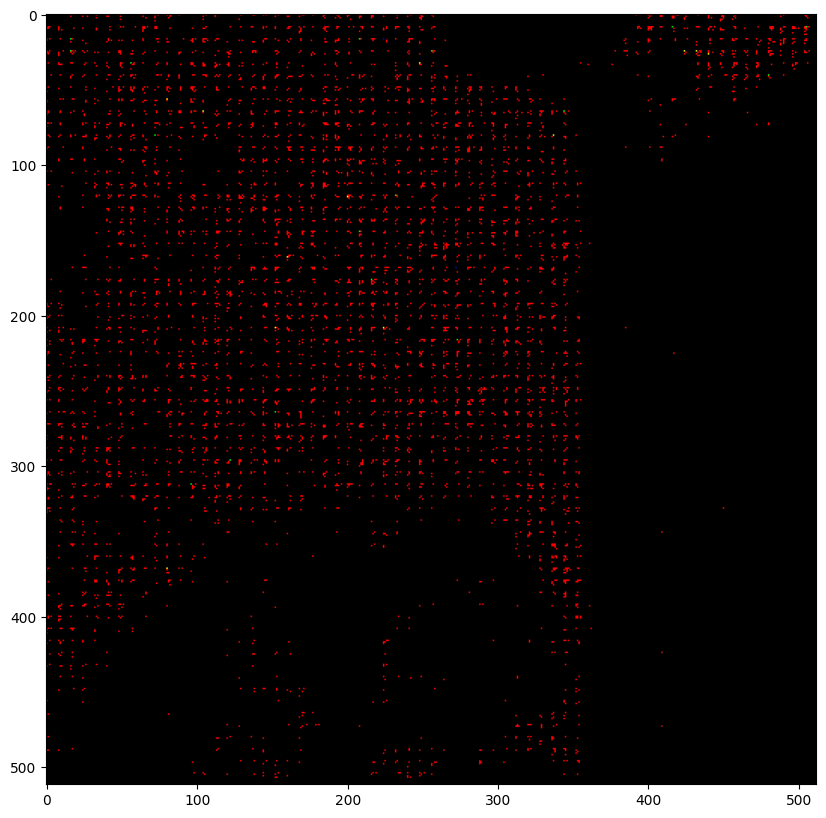

In [ ]:
coverDCT[:,:,0] = jpeg.coef_arrays[0] ; coverDCT[:,:,1] = jpeg.coef_arrays[1] ; coverDCT[:,:,2] = jpeg.coef_arrays[2]
stegoDCT[:,:,0] = stego_juni.coef_arrays[0] ; stegoDCT[:,:,1] = stego_juni.coef_arrays[1] ; stegoDCT[:,:,2] = stego_juni.coef_arrays[2]

DCT_diff = coverDCT - stegoDCT

# So since they are not the same Images the DCT_diff would not be zero
print(len(DCT_diff[np.where(DCT_diff!=0)]))
print(np.unique(DCT_diff))
plt.figure(figsize=(16,10))
plt.imshow( abs(DCT_diff) )
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

from stegano import lsb #USED FOR PNG IMAGE
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm

from PIL import Image
from random import shuffle
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


ModuleNotFoundError: No module named 'stegano'

In [ ]:
import os
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm
from PIL import Image
from random import shuffle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
input_folder = '/content/drive/MyDrive/ALASK'

In [ ]:
extracted_folder_path = '/content/drive/MyDrive/ALASK/stegnalysis'
os.makedirs(extracted_folder_path, exist_ok=True)

In [ ]:
import zipfile
# Specify the name of the zip folder you want to extract
zip_folder_name = '/content/drive/MyDrive/ALASK/UERD.zip'

# Construct the path to the zip folder
zip_folder_path = os.path.join(input_folder, zip_folder_name)

# Create a new folder within the output folder with the same name as the zip folder
extract_folder = os.path.join(extracted_folder_path, os.path.splitext(zip_folder_name)[0])
os.makedirs(extract_folder, exist_ok=True)

# Extract the contents of the zip folder into the new folder
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extraction complete.")

Extraction complete.


In [ ]:
BASE_PATH = "/content/drive/MyDrive/ALASK/stegnalysis"
train_imageids = pd.Series(os.listdir(BASE_PATH + '/Cover')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir(BASE_PATH + '/Test')).sort_values(ascending=True).reset_index(drop=True)

In [ ]:
cover_images_path = pd.Series(BASE_PATH + '/Cover/' + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series(BASE_PATH + '/JMiPOD/'+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series(BASE_PATH + '/JUNIWARD/'+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series(BASE_PATH + '/UERD/'+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series(BASE_PATH + '/Test/'+test_imageids).sort_values(ascending=True)
#ss = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [ ]:
pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c alaska2-image-steganalysis

100% 30.0G/30.0G [07:05<00:00, 72.8MB/s]
100% 30.0G/30.0G [07:05<00:00, 75.7MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/alaska2-image-steganalysis.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
train_imageids = pd.Series(os.listdir('/content/Cover/')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir('/content/Test/')).sort_values(ascending=True).reset_index(drop=True)

In [ ]:
cover_images_path = pd.Series('/content/Cover/' + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series('/content/JMiPOD/'+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series('/content/JUNIWARD/'+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series('/content/UERD/'+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series('/content/Test/'+test_imageids).sort_values(ascending=True)
ss = pd.read_csv(f'/content/sample_submission.csv')

In [ ]:
from scipy.fft import fft2, fftshift
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import cv2
import os

In [ ]:
# Function to load and convert image to grayscale
def load_and_convert_image(path):
    img = cv2.imread(path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_image

# Load 3000 images from each category (Cover, JMIPOD, JUNIWARD, UERD)
num_images = 3000

cover_images = [load_and_convert_image(path) for path in cover_images_path[:num_images]]
jmipod_images = [load_and_convert_image(path) for path in JMIPOD_images_path[:num_images]]
juniward_images = [load_and_convert_image(path) for path in JUNIWARD_images_path[:num_images]]
uerd_images = [load_and_convert_image(path) for path in UERD_images_path[:num_images]]

In [ ]:
def calculate_statistics(image):
    mean = np.mean(image)
    variance = np.var(image)
    skewness = skew(image.flatten())
    kurt = kurtosis(image.flatten())
    return [mean, variance, skewness, kurt]


In [ ]:
import os
import numpy as np
import pandas as pd
from skimage import io
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Calculate statistics for each image
cover_stats = [calculate_statistics(img) for img in cover_images]
jmipod_stats = [calculate_statistics(img) for img in jmipod_images]
juniward_stats = [calculate_statistics(img) for img in juniward_images]
uerd_stats = [calculate_statistics(img) for img in uerd_images]


In [ ]:
# Create labels for the data
cover_labels = [0] * num_images
jmipod_labels = [1] * num_images
juniward_labels = [2] * num_images
uerd_labels = [3] * num_images

In [ ]:
from sklearn.model_selection import train_test_split

# Combine the data and labels
data = cover_stats + jmipod_stats + juniward_stats + uerd_stats
labels = cover_labels + jmipod_labels + juniward_labels + uerd_labels

# Create a DataFrame
df = pd.DataFrame(data, columns=['Mean', 'Variance', 'Skewness', 'Kurtosis'])
df['Label'] = labels

# Split the data
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_clf.predict(X_test)

# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_class_report = classification_report(y_test, gb_y_pred)

print("Gradient Boosting Classifier:")
print(f'Accuracy: {gb_accuracy:.2f}')
print('Classification Report:')
print(gb_class_report)


In [ ]:
GRAPH

In [ ]:
#VISUALIZING SOME IMAGES FROM COVER SECTION
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
k=0
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        img = sk.imread(cover_images_path[k])
        col.imshow(img)
        col.set_title(cover_images_path[k])
        k=k+1
plt.suptitle('Samples from Cover Images', fontsize=14)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
for i in range(3):
    '''
    If you want to print more images just change the values in range and ncols in subplot

    '''
    cvimg = sk.imread(cover_images_path[i])
    uniimg = sk.imread(JUNIWARD_images_path[i])
    jpodimg = sk.imread(JMIPOD_images_path[i])
    uerdimg = sk.imread(UERD_images_path[i])

    ax[i,0].imshow(cvimg)
    ax[i,0].set_title('Cover_IMG'+train_imageids[i])
    ax[i,1].imshow(uniimg)
    ax[i,1].set_title('JNIWARD_IMG'+train_imageids[i])
    ax[i,2].imshow(jpodimg)
    ax[i,2].set_title('JMiPOD_IMG'+train_imageids[i])
    ax[i,3].imshow(uerdimg)
    ax[i,3].set_title('UERD_IMG'+train_imageids[i])

In [ ]:
img_cover = sk.imread(cover_images_path[0])
img_jmipod = sk.imread(JMIPOD_images_path[0])
img_juniward = sk.imread(JUNIWARD_images_path[0])
img_uerd = sk.imread(UERD_images_path[0])


fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
ax[0,0].imshow(img_jmipod)
ax[0,1].imshow((img_cover == img_jmipod).astype(int)[:,:,0])
ax[0,1].set_title(f'{train_imageids[k]} Channel 0')

ax[0,2].imshow((img_cover == img_jmipod).astype(int)[:,:,1])
ax[0,2].set_title(f'{train_imageids[k]} Channel 1')
ax[0,3].imshow((img_cover == img_jmipod).astype(int)[:,:,2])
ax[0,3].set_title(f'{train_imageids[k]} Channel 2')
ax[0,0].set_ylabel('JMiPOD', rotation=90, size='large', fontsize=14)

ax[1,0].imshow(img_juniward)
ax[1,1].imshow((img_cover == img_juniward).astype(int)[:,:,0])
ax[1,2].imshow((img_cover == img_juniward).astype(int)[:,:,1])
ax[1,3].imshow((img_cover == img_juniward).astype(int)[:,:,2])
ax[1,0].set_ylabel('JUNIWARD', rotation=90, size='large', fontsize=14)

ax[2,0].imshow(img_uerd)
ax[2,1].imshow((img_cover == img_uerd).astype(int)[:,:,0])
ax[2,2].imshow((img_cover == img_uerd).astype(int)[:,:,1])
ax[2,3].imshow((img_cover == img_uerd).astype(int)[:,:,2])
ax[2,0].set_ylabel('UERD', rotation=90, size='large', fontsize=14)

plt.suptitle('Pixel Deviation from Cover Image', fontsize=14)

plt.show()

In [ ]:
fig,ax = plt.subplots(3,4,figsize=(20,12))

for i,paths in enumerate(cover_images_path[:3]):
    image = Image.open(paths)
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Cover'+train_imageids[i])
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

In [ ]:
! git clone https://github.com/dwgoon/jpegio


In [ ]:
!pip install jpegio/.
import jpegio as jio

In [ ]:
coverDCT = np.zeros([512,512,3])
stegoDCT = np.zeros([512,512,3])
jpeg = jio.read(cover_images_path[0])
stego_juni = jio.read(JUNIWARD_images_path[0])

In [ ]:
coverDCT[:,:,0] = jpeg.coef_arrays[0] ; coverDCT[:,:,1] = jpeg.coef_arrays[1] ; coverDCT[:,:,2] = jpeg.coef_arrays[2]
stegoDCT[:,:,0] = stego_juni.coef_arrays[0] ; stegoDCT[:,:,1] = stego_juni.coef_arrays[1] ; stegoDCT[:,:,2] = stego_juni.coef_arrays[2]

DCT_diff = coverDCT - stegoDCT
# So since they are not the same Images the DCT_diff would not be zero
print(len(DCT_diff[np.where(DCT_diff!=0)]))
print(np.unique(DCT_diff))
plt.figure(figsize=(16,10))
plt.imshow( abs(DCT_diff) )
plt.show()

In [ ]:

coverPixels = np.array(Image.open(cover_images_path[0])).astype('float')
stegoPixels = np.array(Image.open(JUNIWARD_images_path[0])).astype('float')

pixelsDiff = coverPixels - stegoPixels

# So since they are not the same Images the pixels_diff would not be zero
print(len(pixelsDiff[np.where(pixelsDiff!=0)]))
print(np.unique(pixelsDiff))
plt.figure(figsize=(16,10))
plt.imshow( abs(pixelsDiff) )
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,12))
ax[0].imshow(abs(DCT_diff))
ax[1].imshow(abs(pixelsDiff))